In [1]:
from fastai.vision.all import *
import pandas as pd
import cam
import util

In [2]:
# Use small bs as we have very limited data due to conditional hierarchy filtering
dls, labels = util.chexpert_data_loader(use_hierarchy=True, bs=4)

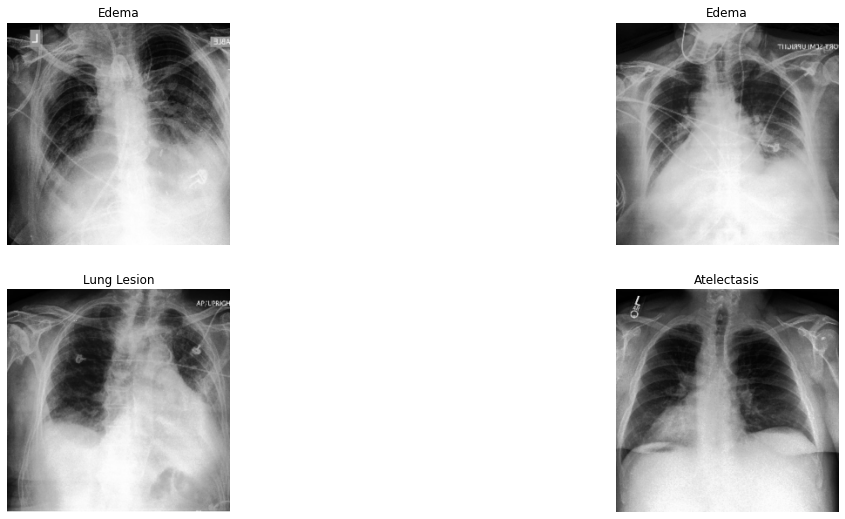

In [3]:
dls.show_batch(max_n=9, figsize=(20,9))

In [4]:
# First train on conditional probabilities
chexpert_learner_conditional = util.ChexpertLearner(dls, densenet121, n_out=len(labels),
                                        loss_func=BCEWithLogitsLossFlat(),
                                        metrics=[RocAucMulti(average=None),
                                                 RocAucMulti(average='weighted')])

lr_min/10: 0.00014454397605732084, lr_steep: 9.12010818865383e-07, base_lr: 0.00014454397605732084


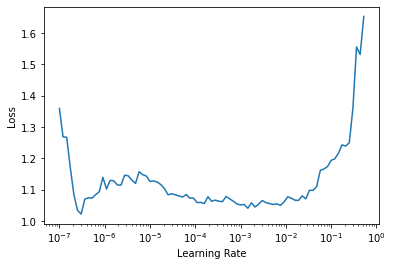

In [5]:
chexpert_learner_conditional.find_lr()

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.968438,0.687522,[0.66534611 0.70849961 0.52733955 0.54937962],0.620289,01:23


Better model found at epoch 0 with valid_loss value: 0.6875221133232117.


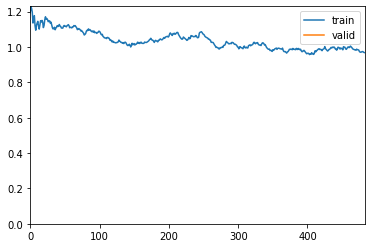

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.894093,0.710677,[0.69123518 0.69845271 0.52683065 0.54670803],0.619342,01:39
1,0.908136,0.694366,[0.68687427 0.71478331 0.5357365 0.55504554],0.628870,01:39
2,0.848752,0.672517,[0.62886186 0.7252678 0.556743 0.56060389],0.629614,01:39
3,0.839917,0.668449,[0.70041766 0.71898411 0.57475262 0.58697913],0.649217,01:40
4,0.813024,0.638709,[0.69863645 0.72614297 0.55903308 0.60689952],0.655768,01:41
5,0.766828,0.610310,[0.66374916 0.73925296 0.59558948 0.60309833],0.660077,01:39
6,0.742289,0.612971,[0.6725324 0.74068823 0.55204976 0.60469411],0.655498,01:41
7,0.719557,0.586129,[0.67698544 0.74635931 0.57709924 0.62041885],0.667436,01:41
8,0.685198,0.570248,[0.72256004 0.74534412 0.53652813 0.62527792],0.668768,01:41
9,0.648792,0.575336,[0.67738468 0.75028005 0.5596268 0.62298286],0.667016,01:40


Better model found at epoch 0 with valid_loss value: 0.7106767892837524.


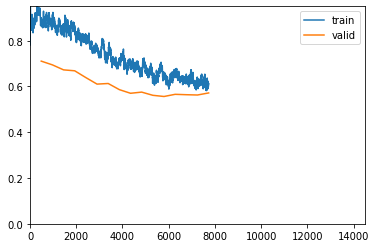

Better model found at epoch 1 with valid_loss value: 0.6943657398223877.
Better model found at epoch 2 with valid_loss value: 0.6725170612335205.
Better model found at epoch 3 with valid_loss value: 0.6684486865997314.
Better model found at epoch 4 with valid_loss value: 0.6387085914611816.
Better model found at epoch 5 with valid_loss value: 0.6103098392486572.
Better model found at epoch 7 with valid_loss value: 0.5861294865608215.
Better model found at epoch 8 with valid_loss value: 0.5702484846115112.
Better model found at epoch 10 with valid_loss value: 0.5613633990287781.
Better model found at epoch 11 with valid_loss value: 0.5561988353729248.
Epoch 13: reducing lr to 6.2633261884726736e-06
Epoch 15: reducing lr to 5.421386226823021e-06
No improvement since epoch 11: early stopping


In [6]:
chexpert_learner_conditional.learn_model(use_saved=False, epochs=30)

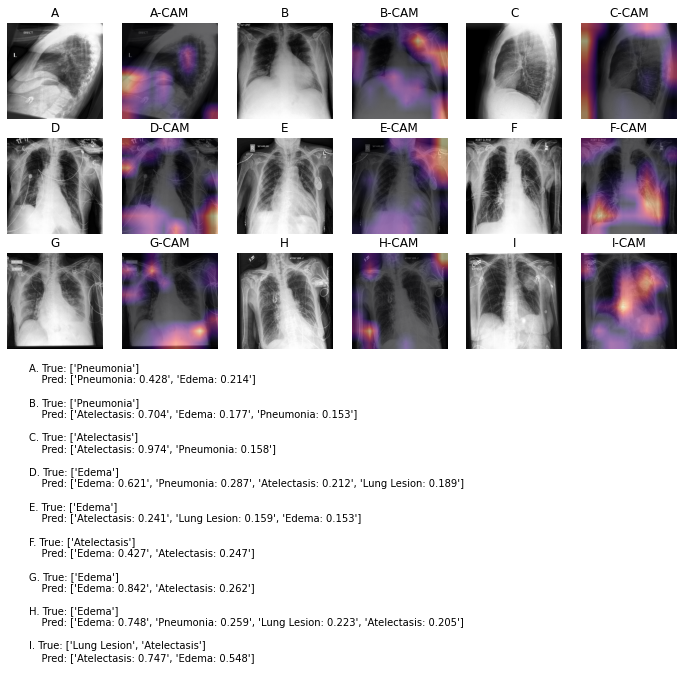

In [7]:
# Let us see how the conditional model predicts
cam.plot_cam(chexpert_learner_conditional.learn)

In [3]:
# Reload the data as it may have been modified for conditional probs
dls, labels = util.chexpert_data_loader()

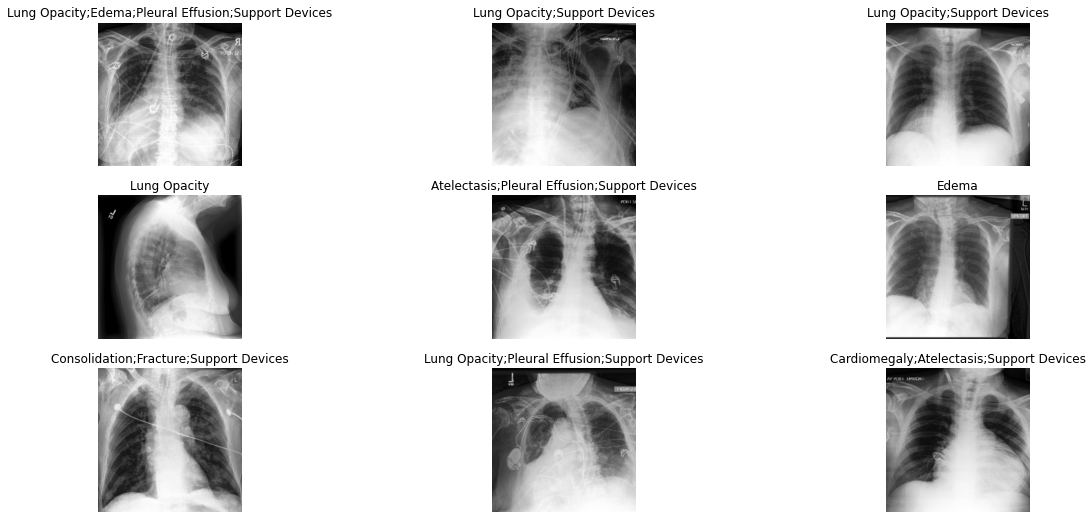

In [4]:
dls.show_batch(max_n=9, figsize=(20,9))

In [5]:
# Next train unconditionally for only transfer learning
chexpert_learner_unconditional = util.ChexpertLearner(dls, densenet121, n_out=len(labels),
                                        loss_func=BCEWithLogitsLossFlat(),
                                        metrics=[RocAucMulti(average=None),
                                                 RocAucMulti(average='weighted')])

lr_min/10: 0.017378008365631102, lr_steep: 0.04786301031708717, base_lr: 0.04786301031708717


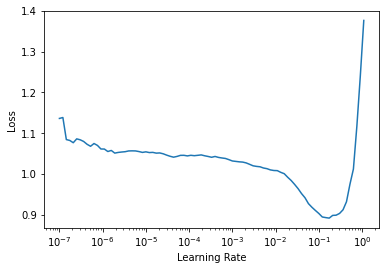

In [6]:
chexpert_learner_unconditional.find_lr()

epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.299598,0.292260,[0.85856179 0.62462497 0.81812706 0.71656748 0.73479382 0.83245289 0.70091125 0.70032146 0.66734642 0.81732346 0.85870953 0.77362706 0.70518882 0.84344878],0.790460,20:03
1,0.291615,0.284954,[0.86406883 0.64268873 0.83788263 0.72199736 0.74169184 0.83800144 0.71354146 0.7096476 0.6783309 0.83471347 0.86999578 0.78151638 0.71291537 0.86069612],0.801708,19:00
2,0.290864,0.282668,[0.86385638 0.64872816 0.84734721 0.7267876 0.75059875 0.84187408 0.71549795 0.73204708 0.6795545 0.84221694 0.87002859 0.78185179 0.73186906 0.86682619],0.806250,19:03
3,0.292263,0.281516,[0.8677076 0.64760986 0.84987752 0.7285235 0.7546298 0.84193019 0.72317868 0.73339606 0.68408702 0.84700093 0.87158872 0.79149535 0.73440402 0.87004241],0.808761,19:10
4,0.294927,0.282331,[0.86376931 0.64280715 0.85022982 0.72745335 0.75364565 0.84455047 0.71639335 0.72589544 0.68078111 0.8508261 0.87183902 0.76245147 0.7289191 0.86800679],0.807471,19:00
5,0.298672,0.285576,[0.86511963 0.65204322 0.84149089 0.72105387 0.75846159 0.83859301 0.71004377 0.72528337 0.67136991 0.8522076 0.87162672 0.78189954 0.72823668 0.87400959],0.806127,19:01
6,0.294634,0.282987,[0.86760602 0.63623147 0.84282189 0.72554484 0.76224227 0.84057388 0.72141631 0.71857752 0.66939689 0.8488878 0.87204778 0.78414591 0.72523368 0.87606885],0.807637,18:57
7,0.296726,0.287431,[0.86000028 0.62480511 0.84511122 0.72219391 0.75557403 0.83900468 0.7137074 0.7140573 0.67029549 0.8444458 0.86840235 0.77302524 0.69374149 0.87042668],0.803331,19:19
8,0.303946,0.300832,[0.86267748 0.59717265 0.83397841 0.71733349 0.69975114 0.8361367 0.72310266 0.67394236 0.65845163 0.84133928 0.86406881 0.74351702 0.67761018 0.87394483],0.798496,19:21


Better model found at epoch 0 with valid_loss value: 0.29225975275039673.


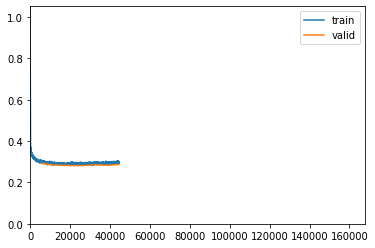

Better model found at epoch 1 with valid_loss value: 0.28495416045188904.
Better model found at epoch 2 with valid_loss value: 0.2826679050922394.
Better model found at epoch 3 with valid_loss value: 0.28151604533195496.
Epoch 5: reducing lr to 0.0006388031431321105
Epoch 7: reducing lr to 0.0009660693695530498
No improvement since epoch 3: early stopping


epoch,train_loss,valid_loss,roc_auc_score,roc_auc_score,time
0,0.289752,0.285352,[0.86322893 0.63857654 0.84588028 0.72753714 0.72836378 0.83375046 0.71576163 0.71668328 0.68481015 0.84555521 0.87194906 0.77044192 0.69288826 0.87570739],0.806724,24:52
1,0.291816,0.283437,[0.86556022 0.65015709 0.85252513 0.72645334 0.7503518 0.8399686 0.71932922 0.73355222 0.68473243 0.85559539 0.87457161 0.77112708 0.71941725 0.88128699],0.811046,24:49
2,0.294970,0.285184,[0.86238774 0.64313312 0.84654461 0.72659248 0.73060442 0.83831685 0.70874572 0.73116588 0.66788718 0.82786526 0.8776655 0.78021193 0.72909567 0.87880573],0.807680,24:42
3,0.301319,0.346494,[0.8625827 0.60577136 0.84695599 0.70701383 0.73402732 0.81920597 0.67503573 0.68181586 0.66431588 0.84775931 0.86687367 0.76756727 0.72045858 0.87067898],0.796141,24:43
4,0.306312,0.450537,[0.85159112 0.59417097 0.83028487 0.71497038 0.73212103 0.8295822 0.69210939 0.65321147 0.66589872 0.84562835 0.86295417 0.64187759 0.61467347 0.87600573],0.795192,24:40
5,0.306665,0.565174,[0.8478852 0.62421571 0.83347473 0.70473074 0.71922522 0.82908443 0.69784947 0.65612951 0.6269535 0.81583747 0.86826467 0.69202969 0.68586196 0.85351329],0.787428,24:47
6,0.309551,1.491323,[0.84669708 0.61887997 0.82789877 0.71262178 0.72482202 0.82337921 0.67614696 0.67142684 0.64088991 0.84379724 0.86686693 0.6747969 0.66562413 0.86640592],0.791823,24:46


Better model found at epoch 0 with valid_loss value: 0.2853521704673767.


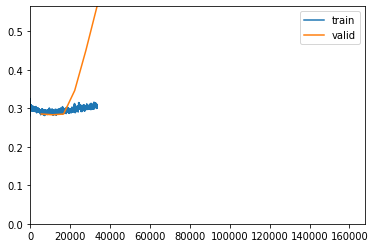

Better model found at epoch 1 with valid_loss value: 0.2834374010562897.
Epoch 3: reducing lr to 0.001269604869201588
Epoch 5: reducing lr to 0.0019144686148888416
No improvement since epoch 1: early stopping


In [7]:
chexpert_learner_unconditional.learn_model(use_saved=True, train_saved=True, epochs=30, freeze_epochs=30)

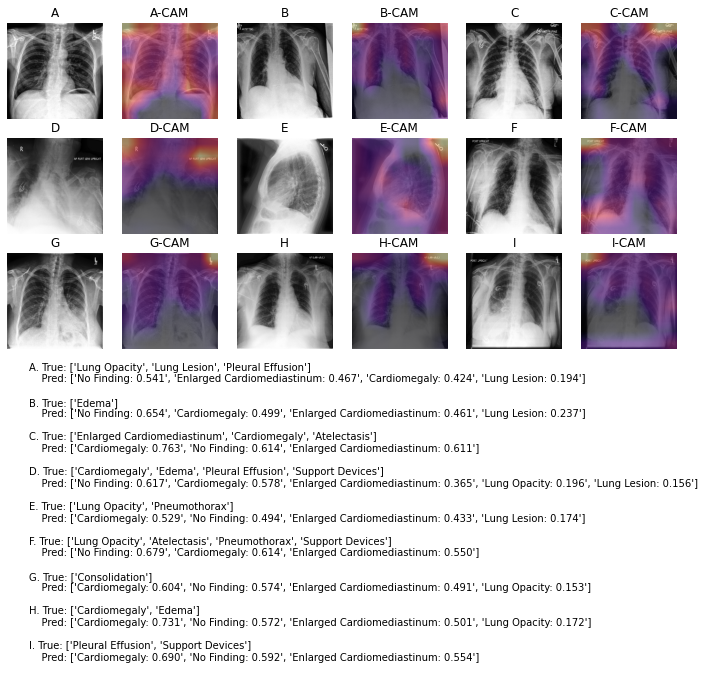

In [14]:
chexpert_learner = cnn_learner(dls, densenet121, path=Path('../saves/'))
chexpert_learner.load('densenet121-chexpert', with_opt=True)
cam.plot_cam(chexpert_learner)